# Задачи к Лекции 2

__Исходные данные__

Дан файл **"mlbootcamp5_train.csv"**. В нем содержатся данные об опросе 70000 пациентов с целью определения наличия заболеваний сердечно-сосудистой системы (ССЗ). Данные в файле промаркированы и если у человека имееются ССЗ, то значение **cardio** будет равно 1, в противном случае - 0. Описание и значения полей представлены во второй лекции.

__Загрузка файла__

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(open("mlbootcamp5_train.csv"),
                 sep=";",
                 index_col="id")
df.head()
#cardio - класс, по которому надо работать, будут ли проблемы с сердцем

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Задачи

**1. Построить наивный байесовский классификатор для количественных полей age, height, weight, ap_hi, ap_lo. Исправить данные, если это необходимо. Привести матрицу неточностей и сравнить со значением полученным в ходе лекции. Попытаться объяснить разницу.**

68703 0.7088482307905041


array([0, 1, 0, ..., 1, 1, 0])

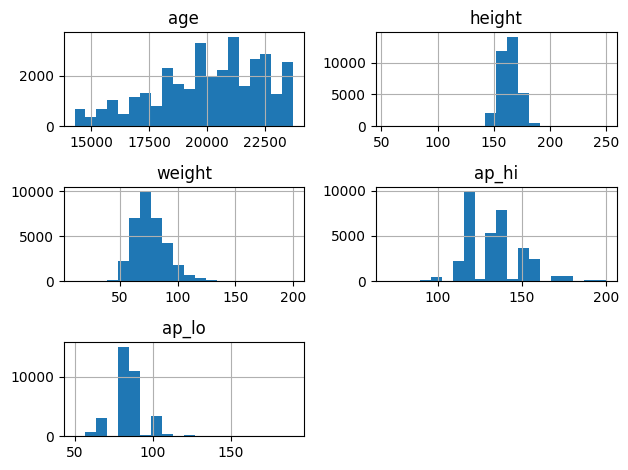

In [2]:
# Your code here (данные изменены)
#df[df["cardio"] == 1][["ap_hi"]].boxplot(); #выбросы, которые логически не могут существовать
data = df[(df["ap_hi"] >= 50) & (df["ap_hi"] <= 200)]
data = data[(data["ap_lo"] >= 50) & (data["ap_lo"] <= 200)] #!добавить фильтрацию  по весу, росту, возрасту

data[data["cardio"] == 1][["age", "height", "weight", "ap_hi", "ap_lo"]].hist(bins=20)
plt.tight_layout()

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

train = data[["age", "height", "weight", "ap_hi", "ap_lo"]]
target = data["cardio"]

model = gnb.fit(train, target)
predict = model.predict(train)
print(data.shape[0],
     (target == predict).sum() / data.shape[0])

predict

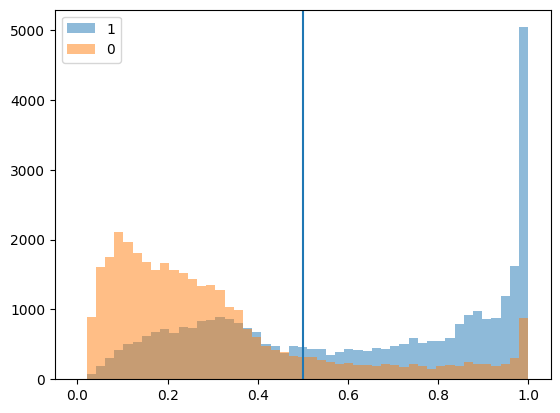

In [3]:
#model.predict(train[1:2]), model.predict_proba(train[1:2])
prob = model.predict_proba(train)[:,1]
plt.hist(prob[target == 1], bins=np.linspace(0, 1, 50), alpha=0.5, label="1");
plt.hist(prob[target == 0], bins=np.linspace(0, 1, 50), alpha=0.5, label="0");
plt.axvline(0.5)
plt.legend();

from sklearn.metrics import confusion_matrix #угадал не угадал

cnf_matrix = confusion_matrix(target, predict)
import itertools
class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

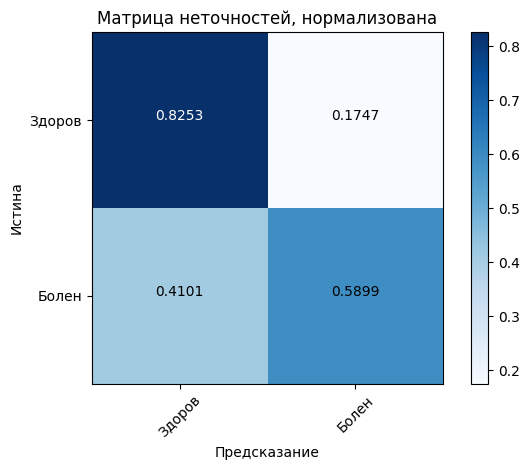

In [4]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Матрица неточностей, нормализована')
plt.show()

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


#выбираем признаки и целевую переменную
features = data[["age", "height", "weight", "ap_hi", "ap_lo"]]
target = data['cardio']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Точность модели: {accuracy:.4f}")

Точность модели: 0.7096


**Комментарии:** Ваши комментарии здесь.

**2. Написать свой наивный байесовский классификатор для категориальных полей cholesterol, gluc. Привести матрицу неточностей и сравнить со значениями из задачи 1 (нельзя использовать готовое решение из sklearn) (не обязательно)**

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.78      0.65      6988
           1       0.65      0.40      0.49      7012

    accuracy                           0.59     14000
   macro avg       0.60      0.59      0.57     14000
weighted avg       0.61      0.59      0.57     14000



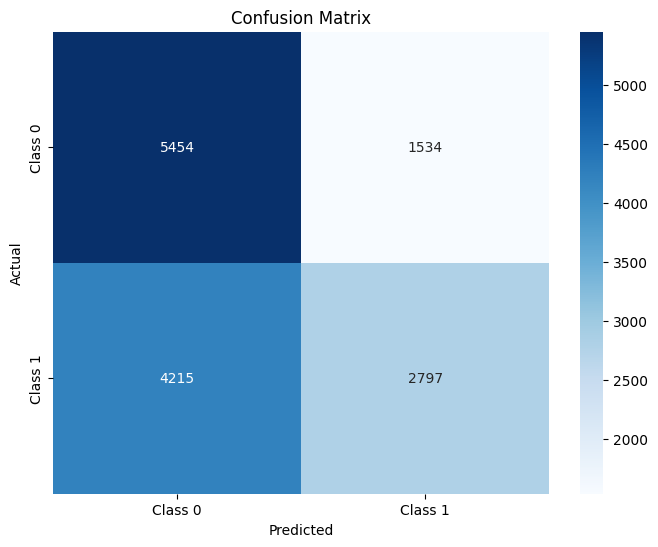


Class probabilities for first 5 samples:
[[0.41714543 0.58285457]
 [0.57906302 0.42093698]
 [0.57906302 0.42093698]
 [0.57906302 0.42093698]
 [0.57906302 0.42093698]]


In [6]:
# Your code here
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(open("mlbootcamp5_train.csv"),
                 sep=";",
                 index_col="id")
df.head()

#выбираем нужные категориальные признаки
features = ['cholesterol', 'gluc']
X = df[features]
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CategoricalNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],  # Замените на ваши классы
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClass probabilities for first 5 samples:")
print(model.predict_proba(X_test[:5]))

**Комментарии:** Ваши комментарии здесь.

**3. Построить наивный байесовский классификатор для бинарных полей gender, smoke, alco, active. Привести матрицу неточностей и сравнить с предыдущими значениями.**

Точность BernoulliNB: 0.5172

Матрица неточностей:
[[8564 1833]
 [8117 2097]]


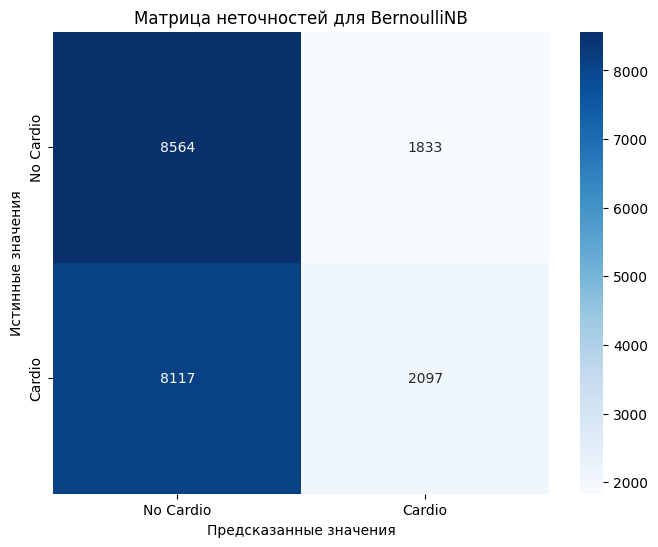

In [7]:
# Your code here
#BernulliNB
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


#выбираем бинарные признаки и целевую переменную
binary_features = data[['gender', 'smoke', 'alco', 'active']]
target = data['cardio']


X_train, X_test, y_train, y_test = train_test_split(binary_features, target, test_size=0.3, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Точность BernoulliNB: {accuracy:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('\nМатрица неточностей:')
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cardio', 'Cardio'],
            yticklabels=['No Cardio', 'Cardio'])
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.title('Матрица неточностей для BernoulliNB')
plt.show()

**Комментарии:** Ваши комментарии здесь.

**4. К этому моменту у вас есть три независимых классификатора: по количественным полям, категориальным и бинарным. Придумать, как их объединить в один единый классификатор, который учитывает все эти поля. Привести матрицу неточностей для него и сравнить с предыдущими значениями. Попытаться объяснить разницу.**

Combined Model Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.72     10185
           1       0.72      0.69      0.70      9922

    accuracy                           0.71     20107
   macro avg       0.71      0.71      0.71     20107
weighted avg       0.71      0.71      0.71     20107

Accuracy: 0.7125


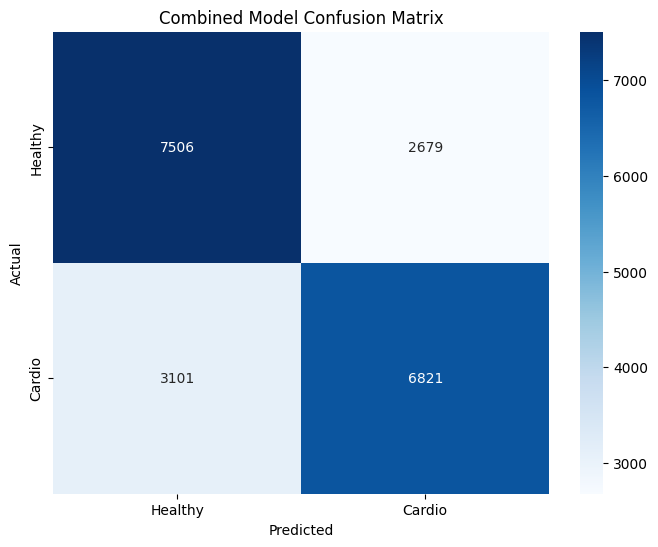


Model Comparison:
GaussianNB (quantitative): 0.7096
CategoricalNB: 0.59 
BernoulliNB: 0.5172
Combined Model: 0.7125 accuracy


In [12]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#фильтрация выбросов для количественных признаков, которые могут навредить обучению
data = data[(data['ap_hi'] >= 50) & (data['ap_hi'] <= 200)]
data = data[(data['ap_lo'] >= 50) & (data['ap_lo'] <= 200)]
data = data[(data['height'] >= 150) & (data['height'] <= 200)]
data = data[(data['weight'] >= 40) & (data['weight'] <= 150)]
data = data[data['ap_hi'] > data['ap_lo']]

#создание новых признаков
#data['bmi'] = data['weight'] / ((data['height']/100)**2)
#data['pulse_pressure'] = data['ap_hi'] - data['ap_lo']

#биннинг возраста - преобразования непрерывного числового признака возраст в категориальный (дискретный) путем разделения на интервалы
age_bins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data['age_bin'] = age_bins.fit_transform(data[['age']]).astype(int)

#разделение признаков по типам данных, количественные, категориальные и бинарные
quant_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'pulse_pressure']
cat_features = ['cholesterol', 'gluc', 'age_bin']
bin_features = ['gender', 'smoke', 'alco', 'active']

#объединение всех признаков
X = data[quant_features + cat_features + bin_features]
y = data['cardio']

#разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#используем RandomForest, который работает со всеми типами данных
from sklearn.ensemble import RandomForestClassifier

combined_model = RandomForestClassifier(n_estimators=100, random_state=42)
combined_model.fit(X_train, y_train)

y_pred = combined_model.predict(X_test)

#выводим аккьюрэси
print("Combined Model Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

#матрица неточностей
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'Cardio'],
            yticklabels=['Healthy', 'Cardio'])
plt.title('Combined Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Сравнение с предыдущими моделями
print("\nModel Comparison:")
print(f"GaussianNB (quantitative): 0.7096")
print(f"CategoricalNB: 0.59 ")
print(f"BernoulliNB: 0.5172")
print(f"Combined Model: {accuracy_score(y_test, y_pred):.4f} accuracy")

**Комментарии:** Ваши комментарии здесь.
Последняя комбинированная модель показала наилучший результат. Это может быть объяснено тем, что в модели используется больше признаков, соответсвенно модель обучается на большем объеме данных. Также, учитывается взаимосвязь нескольких признаков

**5. (Не обязательно) Теперь мы умеем делать классификацию в рамках наивного предположения об независимости всех признаков. Сейчас же нужно попробовать учесть взаимосвязь между признаками через условные вероятности. Построить классификатор с учетом такой связи. Сравнить результат с ранее полученными значениями.**

In [ ]:
# A lot of code here

**Комментарии:** Ваши комментарии здесь.